# Caffe2 基本概念 - Operators

在这个教程中，我们将学习一些Caffe2的基本概念：operators。

首先，让我们导入caffe2的 `core` 和 `workspace`，这两项是你最需要的。如果你想操作由Caffe2生成的协议缓冲区，你也需要从caffe2.proto导入caffe2_pb2。

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

# 导入一些标准库
from matplotlib import pyplot
import numpy as np
import time

# Fof Caffe2
from caffe2.python import core, workspace
from caffe2.proto import caffe2_pb2

%matplotlib inline

## Operators

在Caffe2中Operator类似于函数。从C++方面来看，它们都来自于一个通用接口，并且是按照类型注册的，因此我们可以在运行时调用不同的运算符。

创建一个Operator。

In [2]:
# Create an operator.
op = core.CreateOperator(
    "Relu", # The type of operator that we want to run
    ["X"], # A list of input blobs by their names
    ["Y"], # A list of output blobs by their names
)
# and we are done!

这个创建的op实际上是一个protobuf目标。打印当前operator，看一下它的内容。

In [3]:
print("Type of the created op is: {}".format(type(op)))
print("Content:\n")
print(str(op))

Type of the created op is: <class 'caffe2.proto.caffe2_pb2.OperatorDef'>
Content:

input: "X"
output: "Y"
name: ""
type: "Relu"



运行这个operator。我们首先把X送入workspace。然后以最简单的方式运行operator，`workspace.RunOperaotrOnce(operator)`。

In [4]:
workspace.FeedBlob("X", np.random.randn(2, 3).astype(np.float32))
workspace.RunOperatorOnce(op)

True

执行后，我们看看它运行的是否正确。

在这种情况下，这个operator实现了神经网络中一个常用的激活函数功能，叫做`ReLU`或者`Rectified Linear Unit`激活。ReLU激活有助于向神经网络分类器添加必要的非线性特征，并且定义为：
![](https://render.githubusercontent.com/render/math?math=ReLU%28x%29%20%3D%20max%280%2C%20x%29&mode=display)

In [5]:
print("Current blobs in the workspace: {}\n".format(workspace.Blobs()))
print("X:\n{}\n".format(workspace.FetchBlob("X")))
print("Y:\n{}\n".format(workspace.FetchBlob("Y")))
print("Expected:\n{}\n".format(np.maximum(workspace.FetchBlob("X"), 0)))

Current blobs in the workspace: [u'X', u'Y']

X:
[[-1.2255715  1.0130113  1.6314574]
 [ 0.3601466  1.3649046  0.3979421]]

Y:
[[0.        1.0130113 1.6314574]
 [0.3601466 1.3649046 0.3979421]]

Expected:
[[0.        1.0130113 1.6314574]
 [0.3601466 1.3649046 0.3979421]]



如果需要，Operators也可以选择参数。他们被指定为键值对。让我们看一个简单的例子，它采用张量并用高斯随机变量填充Z.

In [6]:
op = core.CreateOperator(
    "GaussianFill",
    [], # GaussianFill does not need any parameters.
    ["Z"],
    shape=[100, 100], # shape argument as a list of ints.
    mean=1.0,  # mean as a single float
    std=1.0, # std as a single float
)
print("Content of op:\n")
print(str(op))

Content of op:

output: "Z"
name: ""
type: "GaussianFill"
arg {
  name: "std"
  f: 1.0
}
arg {
  name: "shape"
  ints: 100
  ints: 100
}
arg {
  name: "mean"
  f: 1.0
}



运行这个operator，并且可视化结果。

Text(0.5,1,u'Distribution of Z')

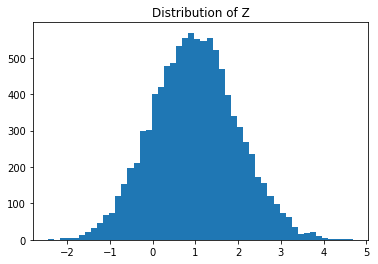

In [7]:
workspace.RunOperatorOnce(op)
temp = workspace.FetchBlob("Z")
pyplot.hist(temp.flatten(), bins=50)
pyplot.title("Distribution of Z")